# Short Term Rental Revenue Predictor

## Overview

In the realm of short-term vacation rental businesses, the ability to predict revenue accurately plays a pivotal role in decision-making processes. As the market for short-term rentals continues to expand rapidly, property owners and managers face the challenge of maximizing profitability while meeting the diverse needs of guests.

This capstone project endeavors to address this challenge by developing a predictive model that can forecast revenue based on a variety of factors including the number of bedrooms, accommodation capacity, location, and available amenities. The significance of such a model lies in its potential to provide valuable insights into the profitability of potential rental properties, enabling stakeholders to make informed decisions about property investments and management strategies.

## Business Understanding

[Cloud 9 Cabins](https://www.cloud9cabins.com/), a prominent player in the vacation rental industry, is poised for expansion and seeks to diversify its property portfolio. However, the company faces a critical challenge: determining the profitability of potential new properties before committing significant resources to their development. This challenge underscores the importance of accurately predicting revenue for each property based on its unique characteristics. By doing so, Cloud 9 Cabins can make informed decisions about which properties to invest in, mitigating the risk of investing in unprofitable ventures and maximizing returns on investment.

The real-world problem at hand is twofold: first, the uncertainty surrounding the revenue potential of new vacation rental properties; and second, the need for Cloud 9 Cabins to optimize its investment strategy to ensure sustainable growth and profitability. The stakeholders directly impacted by this problem include not only Cloud 9 Cabins itself, but also property owners, investors, and local communities seeking economic opportunities. For Cloud 9 Cabins, the ability to accurately predict revenue serves as a cornerstone for strategic decision-making, enabling them to allocate resources efficiently and pursue growth opportunities with confidence.

## Data Understanding

The dataset used in this project was sourced from [AirDNA](https://www.airdna.co/?utm_term=airdna&utm_campaign=brand&utm_source=google&utm_medium=cpc&hsa_acc=6167315757&hsa_cam=17800124565&hsa_grp=142138831187&hsa_ad=611451046477&hsa_src=g&hsa_tgt=kwd-316106200999&hsa_kw=airdna&hsa_mt=e&hsa_net=adwords&hsa_ver=3&gad_source=1&gclid=CjwKCAjw_e2wBhAEEiwAyFFFo69feFRzrMUqCeCQucViuSTUbInd0CrYUD8ZJitUSwl5vGJBddEbCBoCWjkQAvD_BwE). AirDNA is a data analytics company specializing in short-term vacation rental market intelligence. They offer a range of services and products designed to provide valuable insights into the vacation rental industry, helping property owners, managers, investors, and other stakeholders make informed decisions. Here are some key aspects of what AirDNA offers:

1. **Market Data and Analytics:** AirDNA collects and analyzes data from various sources, including vacation rental platforms like Airbnb and Vrbo, to provide comprehensive market insights. This data includes information on rental rates, occupancy rates, demand trends, and other key metrics at both the macro and micro levels.

2. **Competitive Analysis:** AirDNA's platform allows users to conduct competitive analysis by comparing their properties to similar listings in their market. This helps users understand their position relative to competitors and identify opportunities for optimization.

3. **Revenue Management Tools:** AirDNA offers tools and features to help property owners and managers optimize their revenue generation strategies. This may include pricing recommendations based on market demand and competitor analysis, as well as insights into seasonal trends and events impacting rental demand.

4. **Investment Analysis:** AirDNA's data can be valuable for investors looking to assess the potential profitability of vacation rental properties. By providing insights into market dynamics and revenue potential, AirDNA helps investors make data-driven decisions about property acquisitions and portfolio management.

5. **Market Reports and Insights:** AirDNA publishes regular reports and insights on trends and developments in the vacation rental industry. These reports cover topics such as market growth, regulatory changes, and emerging trends, providing valuable information for industry professionals.

For this project, we leveraged AirDNA's comprehensive comp data, sourced from platforms such as Airbnb, Vrbo, third-party data providers, and existing users of AirDNA. This dataset includes information on existing vacation rental properties, encompassing details such as revenue, amenities, occupancy rates, and more. Accessing this invaluable comp data entails contacting AirDNA directly and procuring their product. Interested parties can gain access to this wealth of information by reaching out to AirDNA and engaging with one of their sales representatives. 

### EDA
In the following blocks of code, we will conduct an Exploratory Data Analysis (EDA) on the dataset. First, let us load in all the necessary data sets.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/DR_ML_TTM_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,Property ID,TITLE,Property Manager/ Host ID,BEDROOMS,ACCOMMODATES,Airbnb Host URL,Airbnb Listing URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available Nights,Revenue,Revenue Potential,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
0,abnb_188059,"Vineyard Estate: 33 Acres, Private Vineyard + ...",905546,5.0,12.0,https://www.airbnb.com/users/show/905546,https://www.airbnb.com/rooms/188059,5.5,Glen Ellen,True,...,95442,3.0,320,555481,616369.58,2722.946078,0.666667,500.0,50.0,4.900000
1,abnb_282262,Hudson Valley Farm House 5Br 4.5Ba,836724,6.0,16.0,https://www.airbnb.com/users/show/836724,https://www.airbnb.com/rooms/282262,4.5,Hopewell Junction,True,...,12533,2.0,332,429070,446757.79,1292.379518,1.000000,148.0,109.0,4.950000
2,abnb_253507,Blue Sky Mountain Ranch - 120 acres!,1331143,6.0,12.0,https://www.airbnb.com/users/show/1331143,https://www.airbnb.com/rooms/253507,3.0,Black Hawk,False,...,80422,3.0,327,278428,315974.32,1210.556522,0.703364,490.0,124.0,5.000000
3,abnb_287265,Park City Old Town Fun and Convenience,1494302,4.0,16.0,https://www.airbnb.com/users/show/1494302,https://www.airbnb.com/rooms/287265,4.5,Park City,False,...,84060,5.0,336,241352,269278.50,877.643636,0.818452,350.0,191.0,4.884817
4,abnb_61121,Spacious Secluded Luxury Home five min. from V...,295495,4.0,7.0,https://www.airbnb.com/users/show/295495,https://www.airbnb.com/rooms/61121,3.5,Vail,False,...,81657,5.0,328,159549,188816.81,1100.337931,0.611814,300.0,27.0,5.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property ID                9039 non-null   object 
 1   TITLE                      9039 non-null   object 
 2   Property Manager/ Host ID  9039 non-null   object 
 3   BEDROOMS                   9029 non-null   float64
 4   ACCOMMODATES               9031 non-null   float64
 5   Airbnb Host URL            6397 non-null   object 
 6   Airbnb Listing URL         6397 non-null   object 
 7   BATHROOMS                  9035 non-null   float64
 8   CITY_NAME                  9038 non-null   object 
 9   HAS_AIRCON                 9039 non-null   bool   
 10  HAS_GYM                    9039 non-null   bool   
 11  HAS_HOTTUB                 9039 non-null   bool   
 12  HAS_KITCHEN                9039 non-null   bool   
 13  HAS_PARKING                9039 non-null   bool 

Before getting into the data exploration, we will rename the columns with _ instead of spaces. We can also drop all URL columns right off the bat from the dataset as this is not something we can use to predict revenue.

In [3]:
# unnecessary_columns = ['Airbnb Host URL', 'Airbnb Listing URL', 'Vrbo Listing URL', ]
# df.drop(labels=unnecessary_columns, axis=1, inplace=True)

In [4]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

# #Performing label encoding
# #No becomes 0 and yes becomes 1.
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# encoder = LabelEncoder()

# # Loop over the columns in your DataFrame
# for column in df.columns:
#     # Check if the column is boolean (dtype == bool or dtype == 'bool')
#     if df[column].dtype == bool or df[column].dtype == 'bool':
#         # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
#         df[column] = encoder.fit_transform(df[column])

In [5]:
df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,9029.000000,9031.000000,9035.00000,9039.000000,9039.000000,9039.000000,8539.000000,9039.000000,9.039000e+03,9.039000e+03,9018.000000,9039.000000,8269.000000,8334.000000,7104.000000
mean,4.117399,9.648987,3.59264,38.000648,-104.006820,69021.718000,25.876801,229.997455,1.373537e+05,1.757009e+05,1069.034819,0.606500,331.788487,30.409047,4.844740
std,3.484435,7.006193,2.58326,4.162561,16.982566,31145.185266,50.080222,115.113586,1.668225e+05,2.022262e+05,1186.264521,0.233841,276.060835,48.710011,0.410312
min,0.000000,1.000000,0.00000,27.810775,-149.135930,1029.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.000000,2.00000,34.909264,-116.380115,37863.000000,4.000000,128.000000,1.157000e+04,2.677812e+04,269.905594,0.447167,150.000000,2.000000,4.800000
50%,4.000000,8.000000,3.00000,37.940860,-111.501840,84060.000000,10.000000,256.000000,6.260000e+04,9.631200e+04,635.491108,0.607670,265.000000,10.000000,4.950000
75%,5.000000,12.000000,4.50000,40.669616,-83.599128,92253.000000,29.000000,338.000000,2.139170e+05,2.868685e+05,1478.890986,0.776058,450.000000,38.000000,5.000000
max,211.000000,100.000000,30.00000,60.966000,-69.984322,99587.000000,500.000000,365.000000,1.547297e+06,2.045903e+06,10878.575758,1.000000,5000.000000,518.000000,10.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# Filter the dataset to include only rows where PRICE_TIER is '5. Luxury' or '4. Upscale'
filtered_df = df

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [7]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                9039 non-null   object 
 1   TITLE                      9039 non-null   object 
 2   Property_Manager/_Host_ID  9039 non-null   object 
 3   BEDROOMS                   9029 non-null   float64
 4   ACCOMMODATES               9031 non-null   float64
 5   Airbnb_Host_URL            6397 non-null   object 
 6   Airbnb_Listing_URL         6397 non-null   object 
 7   BATHROOMS                  9035 non-null   float64
 8   CITY_NAME                  9038 non-null   object 
 9   HAS_AIRCON                 9039 non-null   bool   
 10  HAS_GYM                    9039 non-null   bool   
 11  HAS_HOTTUB                 9039 non-null   bool   
 12  HAS_KITCHEN                9039 non-null   bool   
 13  HAS_PARKING                9039 non-null   bool 

In [8]:
import numpy as np

# Calculate the 25th percentile of the 'Available_Nights' column
AN_percentile_25 = np.percentile(filtered_df['Available_Nights'], 25)
Rev_percentile_25 = np.percentile(filtered_df['Revenue'], 25)
# Filter out the rows where 'Available_Nights' is greater than or equal to the 25th percentile
filtered_df = filtered_df[filtered_df['Available_Nights'] >= 200]
filtered_df = filtered_df[filtered_df['MINIMUM_STAY'] <= 100]
filtered_df = filtered_df[filtered_df['Property_Reviews'] >= 10]
filtered_df = filtered_df[filtered_df['Revenue'] <= 700000]
filtered_df = filtered_df[filtered_df['Revenue'] >= 10000]
# Replace zero values in 'Cleaning_Fee' column with NaN
filtered_df['Cleaning_Fee'] = filtered_df['Cleaning_Fee'].replace(0, np.nan)
filtered_df = filtered_df[filtered_df['Occupancy'] >= .25] # To be tested
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 9035
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                3070 non-null   object 
 1   TITLE                      3070 non-null   object 
 2   Property_Manager/_Host_ID  3070 non-null   object 
 3   BEDROOMS                   3070 non-null   float64
 4   ACCOMMODATES               3070 non-null   float64
 5   Airbnb_Host_URL            2391 non-null   object 
 6   Airbnb_Listing_URL         2391 non-null   object 
 7   BATHROOMS                  3070 non-null   float64
 8   CITY_NAME                  3069 non-null   object 
 9   HAS_AIRCON                 3070 non-null   bool   
 10  HAS_GYM                    3070 non-null   bool   
 11  HAS_HOTTUB                 3070 non-null   bool   
 12  HAS_KITCHEN                3070 non-null   bool   
 13  HAS_PARKING                3070 non-null   bool 

In [9]:
filtered_df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3.070000e+03,3070.000000,3070.000000,2902.000000,3070.000000,3070.000000
mean,4.864495,11.732573,4.207492,38.385611,-104.721747,70155.979153,11.837785,318.140065,208548.314007,2.362980e+05,1204.851796,0.628931,411.036527,62.834202,4.884050
std,2.433718,6.541031,2.404231,3.850973,16.329316,29813.156562,14.266618,47.501189,148336.915165,1.635689e+05,904.442022,0.162267,241.861135,59.078259,0.284509
min,0.000000,1.000000,0.000000,27.900390,-123.262180,1230.000000,0.000000,200.000000,10015.000000,1.201900e+04,48.408333,0.252475,5.000000,10.000000,3.000000
25%,3.000000,8.000000,2.500000,35.732754,-116.390715,59065.000000,3.000000,287.000000,71718.750000,8.963204e+04,487.996569,0.515068,227.750000,23.000000,4.818925
50%,5.000000,12.000000,4.000000,38.417835,-111.423548,83340.000000,5.000000,334.000000,177746.500000,2.068038e+05,1063.718194,0.624641,375.000000,43.000000,4.920971
75%,6.000000,16.000000,5.500000,40.649768,-92.714548,92253.000000,28.000000,359.000000,319743.500000,3.458197e+05,1653.677540,0.739810,535.000000,82.000000,5.000000
max,20.000000,90.000000,22.000000,48.904585,-69.997400,98940.000000,100.000000,365.000000,694310.000000,1.306247e+06,7387.139785,1.000000,2600.000000,518.000000,10.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [11]:
filtered_df[filtered_df['ACCOMMODATES'] >= 40]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
194,vrbo_9488848ha,"Mountain Castle: VIEWS, Indoor Pool, Home Thea...",9488848ha,15.0,60.0,NaN,NaN,15.5,Sevierville,True,...,37862,0.0,355,538405,553274.46,2576.100478,0.588732,540.0,14.0,4.3
214,vrbo_9354721ha,Smoky Mountain Retreat: Spectacular Views! Top...,9354721ha,17.0,68.0,NaN,NaN,17.5,Sevierville,True,...,37876,0.0,358,688067,700631.19,2774.463710,0.692737,685.0,14.0,4.3
226,vrbo_9263266ha,"Ridge Top Retreat: Indoor Pool, Theater, New B...",9263266ha,12.0,56.0,NaN,NaN,13.5,Sevierville,True,...,37876,0.0,354,414668,428493.92,2278.395604,0.514124,450.0,11.0,4.4
231,vrbo_9218497ha,"Mountainview Retreat: Indoor Pool, Premier+, R...",9218497ha,13.0,58.0,NaN,NaN,13.5,Pigeon Forge,True,...,37863,0.0,365,428707,428707.00,2355.532967,0.498630,450.0,16.0,4.1
303,vrbo_7826199ha,Private Pool 8 Bedroom Luxury Lodge - Big Timb...,7826199ha,8.0,48.0,NaN,NaN,8.5,Broken Bow,True,...,74728,0.0,345,158451,171642.35,1864.129412,0.278689,400.0,13.0,4.7
324,vrbo_7594966ha,"Free Tickets, Arcade Games, Private Indoor Poo...",RentBranson,12.0,50.0,NaN,NaN,14.5,Branson,True,...,65616,0.0,356,258642,263736.53,1261.668293,0.575843,539.0,34.0,4.9
334,vrbo_752391,"Gorgeous Lodge, Perfect for Family Reunions, P...",752391,9.0,50.0,NaN,NaN,5.5,Heber City,True,...,84032,3.0,257,276393,374142.07,1760.464968,0.623016,475.0,76.0,4.9
354,vrbo_7334379ha,"Timber Lodge: Mtn View, Large Groups, Home The...",7334379ha,16.0,52.0,NaN,NaN,18.0,Sevierville,True,...,37876,0.0,349,434489,457212.28,1905.653509,0.653295,420.0,17.0,4.7
370,vrbo_7157130ha,Zion Reunions Retreats Weddings: Sleeps 56 ppl...,7157130ha,15.0,56.0,NaN,NaN,10.5,Rockville,True,...,84763,2.0,329,541000,574352.05,2746.192893,0.598784,900.0,14.0,5.0
379,vrbo_711406,"Private Mountain Home-pool, 6 private acres ov...",711406,11.0,50.0,NaN,NaN,5.0,Heber City,True,...,84032,3.0,359,291370,299533.50,1471.565657,0.551532,595.0,91.0,4.7


In [12]:
#Minimum stay, we can probably drop this column.
filtered_df[filtered_df['MINIMUM_STAY'] >= 100]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
3037,abnb_875021294592496187,PGAwest*LaQuinta*LuxuriousPoolFamilyHome,324555062,3.0,10.0,https://www.airbnb.com/users/show/324555062,https://www.airbnb.com/rooms/875021294592496187,3.0,La Quinta,True,...,92253,100.0,245,44911,44911.0,787.912281,0.295337,250.0,10.0,5.0


In [13]:
#Minimum stay, we can probably drop this column.
filtered_df[filtered_df['Revenue'] >= 650000]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
214,vrbo_9354721ha,Smoky Mountain Retreat: Spectacular Views! Top...,9354721ha,17.0,68.0,NaN,NaN,17.5,Sevierville,True,...,37876,0.0,358,688067,700631.19,2774.463710,0.692737,685.0,14.0,4.300000
1124,vrbo_326257ha,7 KING SUITES Exclusive & Luxurious - Tennis B...,326257ha,7.0,14.0,NaN,NaN,7.5,Sonoma,True,...,95476,3.0,343,663657,803727.76,5873.070796,0.358730,1350.0,33.0,4.900000
1647,vrbo_2649250,45B Beautiful Large Home Near Town Center,2649250,7.0,16.0,NaN,NaN,4.5,Nantucket,True,...,2554,0.0,337,694310,759161.26,2479.678571,0.830861,500.0,38.0,4.900000
2394,vrbo_1552018,"Mega Views, Luxury Cabin, 11,000 Sq. Ft., Thea...",1552018,15.0,88.0,NaN,NaN,14.0,Gatlinburg,True,...,37738,0.0,358,687145,699569.05,2498.709091,0.768156,975.0,30.0,5.000000
4377,abnb_652810790854656360,"Ski Villa w/Pool, 2 Hot Tubs & Theater",13240717,10.0,16.0,https://www.airbnb.com/users/show/13240717,https://www.airbnb.com/rooms/652810790854656360,13.0,Morrisville,True,...,5661,2.0,365,675309,675309.00,2361.220280,0.785714,350.0,40.0,4.968750
4719,abnb_603625710566246345,"Casa Roca - Unique Luxury Experience, Waterslide",TRAVLR Vacation Homes,8.0,16.0,https://www.airbnb.com/users/show/65309795,https://www.airbnb.com/rooms/603625710566246345,6.0,Palm Desert,True,...,92260,1.0,359,694035,723643.22,3112.264574,0.621170,800.0,51.0,4.933333
5040,abnb_552886810283703168,Luxury Lodge perfect for retreats & reunions,393261846,11.0,16.0,https://www.airbnb.com/users/show/393261846,https://www.airbnb.com/rooms/552886810283703168,11.0,Ellijay,True,...,30540,2.0,362,691661,696640.92,2046.334320,0.933702,975.0,51.0,4.979412
5573,abnb_52216293,Stunning Villa | Pier | Concierge | Ski,10604995,7.0,12.0,https://www.airbnb.com/users/show/10604995,https://www.airbnb.com/rooms/52216293,6.5,Tahoe Vista,True,...,96148,1.0,364,655249,657641.46,5079.449612,0.438776,1200.0,12.0,5.000000
5989,abnb_49384568,Grand Manifest Lodge,Vacation Rental 365,7.0,16.0,https://www.airbnb.com/users/show/2270816,https://www.airbnb.com/rooms/49384568,5.5,Ronald,True,...,98940,1.0,365,691816,691816.00,2022.853801,0.936986,450.0,43.0,4.883721
6375,abnb_46756958,Casa Bella Estate in Wine Country w/ New Pool!,99688607,10.0,16.0,https://www.airbnb.com/users/show/99688607,https://www.airbnb.com/rooms/46756958,7.0,Kenwood,True,...,95452,2.0,355,686108,701150.83,2271.880795,0.850704,575.0,133.0,4.862406


In [14]:
filtered_df[filtered_df['Cleaning_Fee'] == 0]

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating


## Investigating Revenue


## Duplicates

In [15]:
filtered_df['Property_Manager/_Host_ID'].value_counts()

Vacasa                  46
Evolve                  40
Sleepy Forest Resort    21
AvantStay               20
ITrip Vacations         20
                        ..
2144724                  1
14309196                 1
146664960                1
349354279                1
106644202                1
Name: Property_Manager/_Host_ID, Length: 2364, dtype: int64

In [16]:
import pandas as pd

# Assuming df is your original DataFrame

# Get the value counts of Property_Manager/_Host_ID
property_manager_counts = filtered_df['Property_Manager/_Host_ID'].value_counts()

# Filter the property managers with 3 or more occurrences
selected_property_managers = property_manager_counts[property_manager_counts >= 2].index

# Create a new DataFrame with only the selected property managers
duplicate_check_df = filtered_df[filtered_df['Property_Manager/_Host_ID'].isin(selected_property_managers)]

# Now filtered_df contains only the rows where the Property_Manager/_Host_ID has 3 or more occurrences


In [17]:
duplicate_check_df

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
10,abnb_247079,Eco Designer 4BR With Perfect Indoor-Outdoor L...,Green Palm Springs Rentals,4.0,7.0,https://www.airbnb.com/users/show/1273155,https://www.airbnb.com/rooms/247079,2.0,Cathedral City,True,...,92234,29.0,330,28003,31594.18,307.725275,0.541667,349.0,171.0,4.922222
324,vrbo_7594966ha,"Free Tickets, Arcade Games, Private Indoor Poo...",RentBranson,12.0,50.0,NaN,NaN,14.5,Branson,True,...,65616,0.0,356,258642,263736.53,1261.668293,0.575843,539.0,34.0,4.900000
358,vrbo_727642,Stunning Lakefront Home w/ Hot Tub & Private Dock,TaylorMade Deep Creek Vacations & Sales,7.0,18.0,NaN,NaN,5.0,Swanton,True,...,21561,0.0,348,188352,198946.05,1127.856287,0.486880,605.0,38.0,4.700000
513,vrbo_4549240ha,"Luxurious cabin with stunning views, hot tub ,...",Natural Retreats,5.0,13.0,NaN,NaN,7.5,Big Sky,False,...,59716,3.0,337,280168,338719.89,2618.392523,0.414729,918.0,16.0,4.700000
548,vrbo_4292448ha,Spectacular Home with Ski Access and Incredibl...,Natural Retreats,5.0,12.0,NaN,NaN,4.5,Big Sky,False,...,59716,3.0,318,401004,512526.08,2844.000000,0.444795,1157.0,16.0,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8904,abnb_1257151,"Amazing grounds, pool, spa, & more!",6146597,6.0,12.0,https://www.airbnb.com/users/show/6146597,https://www.airbnb.com/rooms/1257151,5.0,Sonoma,True,...,95476,3.0,346,340941,361210.83,1258.084871,0.783237,365.0,227.0,4.870044
8911,abnb_12473143,The Coachella Estate: Your 10 Bedroom Private ...,1166310,10.0,16.0,https://www.airbnb.com/users/show/1166310,https://www.airbnb.com/rooms/12473143,7.0,Indio,True,...,92201,2.0,354,289554,305150.74,1703.258824,0.480226,695.0,188.0,4.938032
8913,abnb_12428815,Literary Oasis on Broad St 132855,William Raveis,3.0,6.0,https://www.airbnb.com/users/show/66353186,https://www.airbnb.com/rooms/12428815,2.5,Nantucket,True,...,2554,7.0,287,209589,280016.24,1240.171598,0.619048,350.0,85.0,4.971765
8960,abnb_11185960,Landmark Premier Residence | L507 - Nestled at...,Destination Residences,4.0,10.0,https://www.airbnb.com/users/show/46098517,https://www.airbnb.com/rooms/11185960,4.0,Vail,True,...,81657,1.0,348,502196,546244.72,3007.161677,0.531847,NaN,22.0,5.000000


In [18]:
# Count the number of unique hosts in the filtered DataFrame
unique_hosts_count = duplicate_check_df['Property_Manager/_Host_ID'].nunique()

print("Number of unique hosts:", unique_hosts_count)


Number of unique hosts: 231


In [19]:
# Group the DataFrame by 'Property_Manager/_Host_ID' and 'TITLE', then count the number of entries in each group
title_counts = duplicate_check_df.groupby(['Property_Manager/_Host_ID', 'TITLE']).size()

# Filter for groups where the count of entries is greater than 1
duplicate_titles = title_counts[title_counts > 1]

# Print the instances where a host has entries with the same title
print("Instances where a host has entries with the same title:")
print(duplicate_titles)


Instances where a host has entries with the same title:
Property_Manager/_Host_ID  TITLE                                             
33539505                   RedrockXanadu, HotTub, Patio&Deck w Panoramic View    2
50573299                   $7 Million Aspen Residence Brand New Construction     2
Doug                       ❤️Wyndham Grand Desert-2 BDRM/2 BATH Deluxe Unit❤️    2
                           ❤️Wyndham Smoky Mountains-2BDRM 2BTH Luxury Unit❤️    2
dtype: int64


In [20]:
# Get the list of duplicate titles by property manager host
duplicate_titles_index = duplicate_titles.index

# Iterate through the groups of duplicate titles
for index in duplicate_titles_index:
    property_manager_host, title = index
    # Get the rows corresponding to the duplicate titles for the specific property manager host and title
    duplicate_rows = duplicate_check_df[(duplicate_check_df['Property_Manager/_Host_ID'] == property_manager_host) & (duplicate_check_df['TITLE'] == title)]
    
    # Display the property manager host and title
    print("Property Manager / Host:", property_manager_host)
    print("Title:", title)
    
    # Get the common columns among duplicate rows
    common_columns = duplicate_rows.columns[duplicate_rows.nunique() == 1]
    print("Common Columns:", common_columns.tolist())
    
    # Get the differing columns among duplicate rows
    differing_columns = duplicate_rows.columns[duplicate_rows.nunique() > 1]
    print("Differing Columns:")
    for column in differing_columns:
        print(column, ":", duplicate_rows[column].tolist())
    
    print("\n")


Property Manager / Host: 33539505
Title: RedrockXanadu, HotTub, Patio&Deck w Panoramic View
Common Columns: ['TITLE', 'Property_Manager/_Host_ID', 'Airbnb_Host_URL', 'CITY_NAME', 'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST', 'Vrbo_Listing_URL', 'ZIPCODE']
Differing Columns:
Property_ID : ['abnb_553687819125944286', 'abnb_553687802281376326']
BEDROOMS : [4.0, 6.0]
ACCOMMODATES : [12.0, 16.0]
Airbnb_Listing_URL : ['https://www.airbnb.com/rooms/553687819125944286', 'https://www.airbnb.com/rooms/553687802281376326']
BATHROOMS : [3.0, 5.0]
LATITUDE : [34.83396, 34.834559999999996]
LONGITUDE : [-111.78052, -111.78299999999999]
MINIMUM_STAY : [3.0, 2.0]
Available_Nights : [360, 365]
Revenue : [322405, 507318]
Revenue_Potential : [326226.32, 507318.0]
ADR : [1305.2834008097166, 1818.3440860215053]
Occupancy : [0.6861111111111111, 0.7643835616438356]
Cleaning_Fee : [375.0, 525.0]
Prop

In [21]:
#Performing label encoding
#No becomes 0 and yes becomes 1.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Loop over the columns in your DataFrame
for column in filtered_df.columns:
    # Check if the column is boolean (dtype == bool or dtype == 'bool')
    if filtered_df[column].dtype == bool or filtered_df[column].dtype == 'bool':
        # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
        filtered_df[column] = encoder.fit_transform(filtered_df[column])

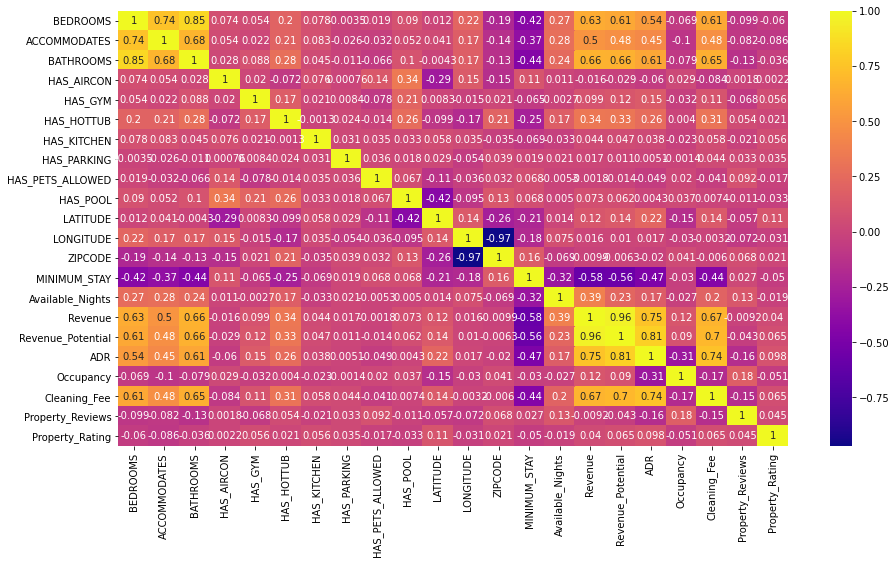

In [22]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(filtered_df.select_dtypes('number').corr(),annot=True,cmap='plasma');

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming df is your DataFrame containing variables including 'revenue'

# Get the list of variables that share high correlation with revenue
high_corr_vars = [col for col in filtered_df.select_dtypes(include=['float64', 'int64']).columns 
                  if col != 'Revenue']

# Define a dropdown widget to select variables
variable_dropdown = widgets.Dropdown(options=high_corr_vars, description='Select Variable:')

# Define a function to update the plot based on the selected variable
def update_plot(selected_variable):
    plt.figure(figsize=(10, 6))
    if filtered_df[selected_variable].dtype == 'float64' or filtered_df[selected_variable].dtype == 'int64':
        sns.scatterplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Scatter plot of {selected_variable} vs Revenue')
    elif filtered_df[selected_variable].dtype == 'object':
        sns.boxplot(x=selected_variable, y='Revenue', data=filtered_df)
        plt.title(f'Box plot of {selected_variable} vs Revenue')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.xlabel(selected_variable)
    plt.ylabel('Revenue')
    plt.show()

# Display the dropdown widget and plot

widgets.interactive(update_plot, selected_variable=variable_dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS…

In [24]:
# Define a threshold for the difference between 'Revenue Potential' and 'Revenue'
threshold = 100000  # Adjust the threshold as needed

# Filter the DataFrame to include only rows where 'Revenue Potential' is much greater than 'Revenue'
potential_greater_df = df[df['Revenue_Potential'] - df['Revenue'] > threshold]

# Display the resulting DataFrame
potential_greater_df


,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
67,vrbo_981923,"Ski In/Out High-End Mountain Home in Old Town,...",981923,5.0,12.0,NaN,NaN,5.5,Park City,True,...,84060,4.0,197,181118,456032.50,3622.360000,0.471698,650.0,39.0,5.000000
69,vrbo_9806415ha,Sleeps 46: Townies | Pool/Spa | Garage | Downt...,9806415ha,11.0,46.0,NaN,NaN,9.0,Moab,True,...,84532,0.0,250,200062,308904.51,1130.293785,0.716599,NaN,0.0,NaN
74,vrbo_9791198ha,"Views of the red rocks, come enjoy your privat...",9791198ha,11.0,26.0,NaN,NaN,11.0,Sedona,True,...,86351,0.0,160,414571,847380.09,3213.728682,0.806250,995.0,0.0,NaN
75,vrbo_9791193ha,Modern cabins for 45 with views of the red roc...,9791193ha,10.0,45.0,NaN,NaN,10.0,Sedona,True,...,86336,0.0,186,413193,552761.33,3228.070312,0.688172,850.0,0.0,NaN
77,vrbo_9786880ha,"Exquisite Manor by InvitedHome | Ski-in/out, H...",9786880ha,9.0,20.0,NaN,NaN,10.0,Telluride,False,...,81435,0.0,264,210725,436776.32,3398.790323,0.430556,1500.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,abnb_11571342,Heavenly Valley Condo Lake Tahoe ~ 3BR,Just Go Away Travel LLC,3.0,8.0,https://www.airbnb.com/users/show/52651623,https://www.airbnb.com/rooms/11571342,3.0,South Lake Tahoe,False,...,96150,6.0,102,73094,278557.45,1461.880000,0.793651,0.0,0.0,NaN
8954,abnb_11341765,Westin Riverfront Mountain 2B Villa,2910661,2.0,8.0,https://www.airbnb.com/users/show/2910661,https://www.airbnb.com/rooms/11341765,2.0,Avon,True,...,81620,6.0,129,154589,401568.53,1680.315217,0.741935,0.0,2.0,4.500000
8975,abnb_10536841,"Elegant, Spacious, mountainside, Hot Tub & Sauna",54333703,5.0,14.0,https://www.airbnb.com/users/show/54333703,https://www.airbnb.com/rooms/10536841,4.0,Teton Village,True,...,83025,3.0,304,342084,455392.20,2085.878049,0.583630,880.0,158.0,5.000000
8993,abnb_10277531,Luxury 4 bdr unit 1/16/22 to 1/23/22,29515026,4.0,14.0,https://www.airbnb.com/users/show/29515026,https://www.airbnb.com/rooms/10277531,4.0,Park City,True,...,84098,4.0,105,427436,603409.13,4697.098901,0.900990,250.0,0.0,NaN


In [25]:
#Might want to look at using revenue potential as the target, since this is a measure of revenue based on the house being full optimized for rental.
#Could also be inflated due to seasonal spikes, like maybe some properties only do well during ski season, then drop off after.
#So really revenue is accurate for its location.

In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 9035
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                3070 non-null   object 
 1   TITLE                      3070 non-null   object 
 2   Property_Manager/_Host_ID  3070 non-null   object 
 3   BEDROOMS                   3070 non-null   float64
 4   ACCOMMODATES               3070 non-null   float64
 5   Airbnb_Host_URL            2391 non-null   object 
 6   Airbnb_Listing_URL         2391 non-null   object 
 7   BATHROOMS                  3070 non-null   float64
 8   CITY_NAME                  3069 non-null   object 
 9   HAS_AIRCON                 3070 non-null   int64  
 10  HAS_GYM                    3070 non-null   int64  
 11  HAS_HOTTUB                 3070 non-null   int64  
 12  HAS_KITCHEN                3070 non-null   int64  
 13  HAS_PARKING                3070 non-null   int64

In [27]:
filtered_df.drop(labels=['Revenue_Potential', 'Airbnb_Host_URL', 'Airbnb_Listing_URL', 'Vrbo_Listing_URL', 'SUPERHOST', 
                        'INSTANT_BOOK', 'Property_ID', 'TITLE', 'Property_Manager/_Host_ID', 'BATHROOMS',
                        'CITY_NAME', 'HAS_AIRCON', 'LATITUDE', 'LONGITUDE', 'ZIPCODE', 'ADR'], axis=1, inplace=True)

X= filtered_df.drop(labels=['Revenue'], axis=1)
y= filtered_df['Revenue']
X

,BEDROOMS,ACCOMMODATES,HAS_GYM,HAS_HOTTUB,HAS_KITCHEN,HAS_PARKING,HAS_PETS_ALLOWED,HAS_POOL,PRICE_TIER,STATE_NAME,MINIMUM_STAY,Available_Nights,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
0,5.0,12.0,1,1,1,1,0,1,5. Luxury,California,3.0,320,0.666667,500.0,50.0,4.900000
1,6.0,16.0,0,0,1,1,1,0,5. Luxury,New York,2.0,332,1.000000,148.0,109.0,4.950000
2,6.0,12.0,0,1,1,1,1,0,5. Luxury,Colorado,3.0,327,0.703364,490.0,124.0,5.000000
3,4.0,16.0,0,1,1,1,1,0,2. Economy,Utah,5.0,336,0.818452,350.0,191.0,4.884817
4,4.0,7.0,0,1,1,1,0,0,3. Midscale,Colorado,5.0,328,0.611814,300.0,27.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,7.0,16.0,0,1,1,1,0,0,5. Luxury,California,30.0,204,0.577778,700.0,67.0,4.917910
9016,2.0,6.0,0,0,1,1,1,0,3. Midscale,Vermont,31.0,363,0.469274,NaN,14.0,4.500000
9021,3.0,6.0,0,0,1,1,1,0,3. Midscale,California,30.0,257,0.386047,200.0,131.0,4.850000
9026,6.0,12.0,0,0,1,1,1,0,5. Luxury,Massachusetts,7.0,235,0.731034,300.0,43.0,4.913953


In [28]:
X['PRICE_TIER'].value_counts()

5. Luxury      1336
4. Upscale      715
3. Midscale     469
2. Economy      322
1. Budget       228
Name: PRICE_TIER, dtype: int64

In [29]:
# Manual mapping
price_tier_mapping = {
    '1. Budget': 1,
    '2. Economy': 2,
    '3. Midscale': 3,
    '4. Upscale': 4,
    '5. Luxury': 5,
}

# Assuming 'df' is your DataFrame and 'PRICE_TIER' is the column
X['PRICE_TIER'] = X['PRICE_TIER'].map(price_tier_mapping)
X['PRICE_TIER'].value_counts()

5    1336
4     715
3     469
2     322
1     228
Name: PRICE_TIER, dtype: int64

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 9035
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BEDROOMS          3070 non-null   float64
 1   ACCOMMODATES      3070 non-null   float64
 2   HAS_GYM           3070 non-null   int64  
 3   HAS_HOTTUB        3070 non-null   int64  
 4   HAS_KITCHEN       3070 non-null   int64  
 5   HAS_PARKING       3070 non-null   int64  
 6   HAS_PETS_ALLOWED  3070 non-null   int64  
 7   HAS_POOL          3070 non-null   int64  
 8   PRICE_TIER        3070 non-null   int64  
 9   STATE_NAME        3070 non-null   object 
 10  MINIMUM_STAY      3070 non-null   float64
 11  Available_Nights  3070 non-null   int64  
 12  Occupancy         3070 non-null   float64
 13  Cleaning_Fee      2902 non-null   float64
 14  Property_Reviews  3070 non-null   float64
 15  Property_Rating   3070 non-null   float64
dtypes: float64(7), int64(8), object(1)
memory 

In [31]:
# 'MINIMUM_STAY', 'Available_Nights', 
X.drop(labels=['Occupancy', 'Property_Reviews', 'Property_Rating'], inplace=True, axis=1)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [34]:
from sklearn.pipeline import Pipeline

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

In [35]:

state_list = X['STATE_NAME'].unique().tolist()

numeric_pipeline = Pipeline([('numimputer', SimpleImputer(strategy = 'mean')), ('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first', handle_unknown = 'ignore', categories=[state_list]))])



In [36]:
num_cols = X_train.select_dtypes(['int64', 'float64']).columns

ct = ColumnTransformer(
    [("numpipe", numeric_pipeline, num_cols), 
     ("nominalpipe", nominal_pipeline, ['STATE_NAME'])])

num_cols

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')

In [37]:
ct

ColumnTransformer(transformers=[('numpipe',
                                 Pipeline(steps=[('numimputer',
                                                  SimpleImputer()),
                                                 ('numnorm',
                                                  StandardScaler())]),
                                 Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                ('nominalpipe',
                                 Pipeline(steps=[('on...
                                                                             'Vermont',
                                                                             'Tennessee',
                                                                             'Florida',
                                                                             'Montana',
                                                                             'North '
                                                                             'Carolina',
                                                                             'Oklahoma',
                                                                             'Texas',
                                                                             'Nevada',
                                                                             'Massachusetts',
                                                                             'Idaho',
                                                                             'Washington',
                                                                             'Georgia',
                                                                             'Missouri',
                                                                             'Maryland',
                                                                             'New '
                                                                             'Hampshire',
                                                                             'Arizona',
                                                                             'Maine',
                                                                             'Oregon',
                                                                             'New '
                                                                             'Mexico',
                                                                             'South '
                                                                             'Carolina',
                                                                             'Arkansas',
                                                                             'South '
                                                                             'Dakota',
                                                                             'West '
                                                                             'Virginia']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['STATE_NAME'])])

In [38]:
X_train.columns

Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'STATE_NAME', 'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')

In [39]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Global DataFrame to store evaluation results
all_metrics_df = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'Train R^2', 'Test R^2'])

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    global all_metrics_df
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4)
    test_rmse = round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4)
    train_mae = round(mean_absolute_error(y_train, y_train_pred), 4)
    test_mae = round(mean_absolute_error(y_test, y_test_pred), 4)
    train_r2 = round(model.score(X_train, y_train), 4)
    test_r2 = round(model.score(X_test, y_test), 4)
    
    # Store metrics in the global DataFrame
    model_metrics = pd.DataFrame({
        'Model': [model_name],
        'Train RMSE': [train_rmse],
        'Test RMSE': [test_rmse],
        'Train MAE': [train_mae],
        'Test MAE': [test_mae],
        'Train R^2': [train_r2],
        'Test R^2': [test_r2]
    })
    all_metrics_df = pd.concat([all_metrics_df, model_metrics], ignore_index=True)
    
    # Visualizations
    plot_evaluation_results(y_test, y_test_pred, model_name)
    
    # Return metrics for the current model
    return model_metrics

def plot_evaluation_results(y_test, y_test_pred, model_name):
    # Visualizations
    plt.figure(figsize=(12, 4))
    
    # Actual vs. predicted values
    plt.subplot(1, 3, 1)
    plt.scatter(y_test_pred, y_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
    plt.xlabel('Predicted Revenue')
    plt.ylabel('Actual Revenue')
    plt.title('Predicted vs. Actual Revenue (' + model_name + ')')
    
    # Residual plot
    plt.subplot(1, 3, 2)
    residuals = y_test - y_test_pred
    sns.residplot(y_test_pred, residuals, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Predicted Revenue')
    plt.ylabel('Residuals')
    plt.title('Residual Plot (' + model_name + ')')
    
    # Distribution plot of residuals
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals (' + model_name + ')')
    
    plt.tight_layout()
    plt.show()


## Modeling

In [41]:
from sklearn.linear_model import LinearRegression

### First Model Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
final_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       LinearRegression())])
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', LinearRegression())])

In [43]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.6873
Baseline Test Rsquared: 0.6933


In [44]:
linear_regression_model = final_pipe.named_steps['model']
coefficients = linear_regression_model.coef_
coefficients

array([ 4.63587605e+04, -2.71787899e+03,  3.99217121e+03,  6.62717084e+03,
       -3.47286723e+03,  3.36653546e+02, -1.61519137e+02,  3.68416910e+03,
        3.27572327e+04, -3.20747471e+04,  2.25909878e+04,  3.75253604e+04,
       -3.50942265e+04, -5.09407361e+03, -1.69350812e+04,  1.15318963e+04,
       -5.61510427e+04, -1.42780054e+04, -4.85671596e+04, -1.19527205e+05,
       -4.36751036e+04, -5.61356766e+04, -6.12800701e+04,  1.96211660e+04,
       -1.61403734e+04, -1.97941870e+04, -6.05386862e+04,  3.51386697e+04,
       -6.11341504e+04, -1.26024517e+05, -2.08195732e+04, -5.84135527e+04,
       -6.78319174e+03, -3.08400172e+04, -3.75124720e+04,  6.08143210e+04,
       -6.17536971e+04, -3.16354802e+04, -2.12584862e+05, -4.01276351e+04])

In [45]:
# Example setup - you'll need to adjust this based on your actual data
num_features = num_cols  # Assuming these are your numeric features
cat_features_info = {
    'STATE_NAME': state_list
}

transformed_feature_names = []  # Initialize an empty list for all feature names post-transformation

# Add numeric feature names directly, as they are unchanged
transformed_feature_names.extend(num_features)

# Manually construct feature names for the one-hot encoded categorical features, excluding the first category
for feature, categories in cat_features_info.items():
    # Iterate over categories starting from the second one (index 1) if the first category is dropped
    for category in categories[1:]:
        transformed_feature_names.append(f"{feature}_{category}")

In [46]:
# Ensure 'transformed_feature_names' and 'coefficients' are correctly defined as above
for predictor, coef in zip(transformed_feature_names, coefficients):
    print(f'Predictor: {predictor}, Coefficient: {coef}')

Predictor: BEDROOMS, Coefficient: 46358.76048062565
Predictor: ACCOMMODATES, Coefficient: -2717.878985982592
Predictor: HAS_GYM, Coefficient: 3992.1712084410497
Predictor: HAS_HOTTUB, Coefficient: 6627.170835234057
Predictor: HAS_KITCHEN, Coefficient: -3472.867225236191
Predictor: HAS_PARKING, Coefficient: 336.6535456488644
Predictor: HAS_PETS_ALLOWED, Coefficient: -161.5191374470615
Predictor: HAS_POOL, Coefficient: 3684.169102208094
Predictor: PRICE_TIER, Coefficient: 32757.232739914067
Predictor: MINIMUM_STAY, Coefficient: -32074.747147785274
Predictor: Available_Nights, Coefficient: 22590.987778449657
Predictor: Cleaning_Fee, Coefficient: 37525.36042222274
Predictor: STATE_NAME_New York, Coefficient: -35094.22646585915
Predictor: STATE_NAME_Colorado, Coefficient: -5094.073609199268
Predictor: STATE_NAME_Utah, Coefficient: -16935.081247921615
Predictor: STATE_NAME_Wyoming, Coefficient: 11531.896291775063
Predictor: STATE_NAME_Pennsylvania, Coefficient: -56151.042747938955
Predictor:

In [47]:
final_pipe_grid = {'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
             'model__fit_intercept': [True, False]}
gs_lr_full_pipe = GridSearchCV(estimator = final_pipe, param_grid = final_pipe_grid, cv=5)
gs_lr_full_pipe.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_lr_full_pipe.best_score_, 4)}')
print(f'Best Parameters: {gs_lr_full_pipe.best_params_}')

best_lr_model = gs_lr_full_pipe.best_estimator_

Best GS Score: 0.674
Best Parameters: {'model__fit_intercept': True, 'preprocess__numpipe__numimputer__strategy': 'mean'}


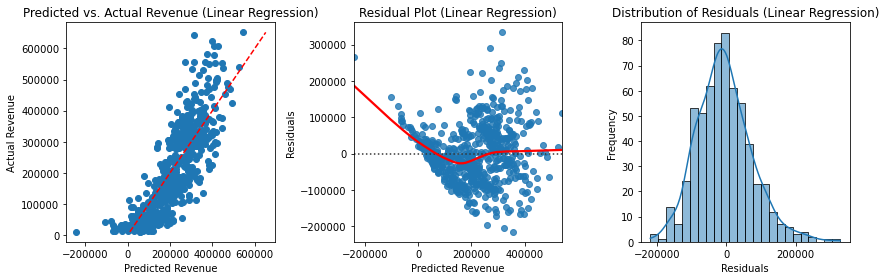

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Linear Regression,83545.6686,79516.2759,61888.486,61672.2107,0.6873,0.6933


In [48]:
evaluate_model(best_lr_model, X_train, y_train, X_test, y_test, 'Linear Regression')

### Next Model (Ridge Regression)

In [49]:
from sklearn.linear_model import Ridge

In [50]:
final_pipe.steps[-1] = ('model', Ridge(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Ridge(random_state=42))])

In [51]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.687
Baseline Test Rsquared: 0.6933


In [52]:
final_pipe_grid_r = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 0.2, 0.4, 0.5, 0.8, 1.0, 1.6, 2.0, 3.2, 4.0, 6.0, 8.0, 10.0],  # Regularization strength
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Solver for optimization
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_r = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_r, cv=5)
gs_full_pipe_r.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_r.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_r.best_params_}')

best_r_model = gs_full_pipe_r.best_estimator_

Best GS Score: 0.6748
Best Parameters: {'model__alpha': 3.2, 'model__random_state': 42, 'model__solver': 'auto', 'preprocess__numpipe__numimputer__strategy': 'mean'}


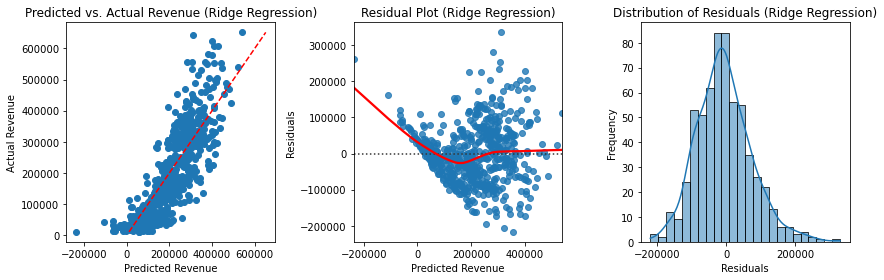

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Ridge Regression,83686.9855,79608.6407,62062.8609,61602.7549,0.6863,0.6926


In [53]:
evaluate_model(best_r_model, X_train, y_train, X_test, y_test, 'Ridge Regression')

# Next Model (Lasso)

In [54]:
from sklearn.linear_model import Lasso

In [55]:
final_pipe.steps[-1] = ('model', Lasso(random_state=42, max_iter=1000))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', Lasso(random_state=42))])

In [56]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.6873
Baseline Test Rsquared: 0.6933


In [57]:
final_pipe_grid_l = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 1.5, 2.0],  # Regularization strength
    'model__max_iter': [500, 1000, 1500, 2000, 2500],  # Maximum number of iterations
    'model__random_state': [42]  # Random state for reproducibility
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_l = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_l, cv=5)
gs_full_pipe_l.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_l.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_l.best_params_}')

best_l_model = gs_full_pipe_l.best_estimator_

Best GS Score: 0.674
Best Parameters: {'model__alpha': 2.0, 'model__max_iter': 500, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'mean'}


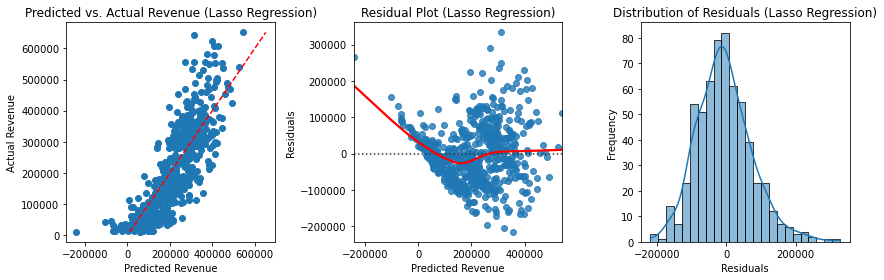

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Lasso Regression,83545.8858,79513.7219,61891.9664,61667.7066,0.6873,0.6934


In [58]:
evaluate_model(best_l_model, X_train, y_train, X_test, y_test, 'Lasso Regression')

# Next Model KNN Regressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

In [60]:
final_pipe.steps[-1] = ('model', KNeighborsRegressor())
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', KNeighborsRegressor())])

In [61]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.7603
Baseline Test Rsquared: 0.6418


In [62]:
final_pipe_grid_knn = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__n_neighbors': [10, 12, 14, 16, 18, 20],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__leaf_size': [10, 15, 20, 25, 30, 35],
    'model__p': [1, 2]
}

gs_full_pipe_knn = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_knn, cv=5)
gs_full_pipe_knn.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_knn.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_knn.best_params_}')

best_knn_model = gs_full_pipe_knn.best_estimator_

Best GS Score: 0.6983
Best Parameters: {'model__algorithm': 'ball_tree', 'model__leaf_size': 35, 'model__n_neighbors': 16, 'model__p': 1, 'model__weights': 'distance', 'preprocess__numpipe__numimputer__strategy': 'median'}


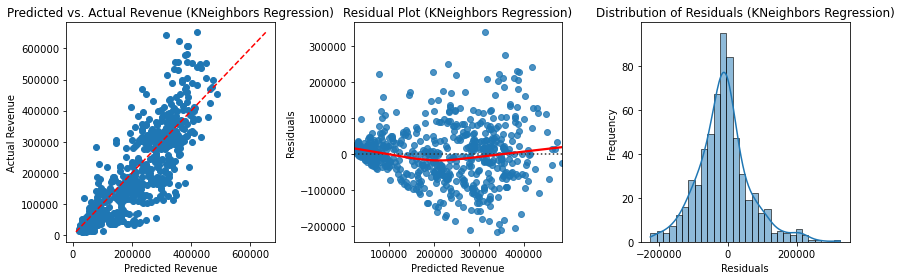

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,KNeighbors Regression,474.8732,78556.6315,21.9353,57644.6915,1.0,0.7007


In [63]:
evaluate_model(best_knn_model, X_train, y_train, X_test, y_test, 'KNeighbors Regression')

# Next Model (Decision Tree Regressor)

In [64]:
final_pipe.steps[-1] = ('model', DecisionTreeRegressor(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [65]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 1.0
Baseline Test Rsquared: 0.6034


In [66]:
final_pipe_grid_dt = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [None, 2, 4, 6, 8, 10],
    'model__min_samples_split': [2, 4, 6, 8, 10],
    'model__min_samples_leaf': [2, 4, 6, 8, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__random_state': [42]
}

gs_full_pipe_dt = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_dt, cv=5)
gs_full_pipe_dt.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_dt.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_dt.best_params_}')

best_dt_model = gs_full_pipe_dt.best_estimator_

Best GS Score: 0.741
Best Parameters: {'model__criterion': 'squared_error', 'model__max_depth': 6, 'model__max_features': 'auto', 'model__min_samples_leaf': 10, 'model__min_samples_split': 2, 'model__random_state': 42, 'model__splitter': 'best', 'preprocess__numpipe__numimputer__strategy': 'mean'}


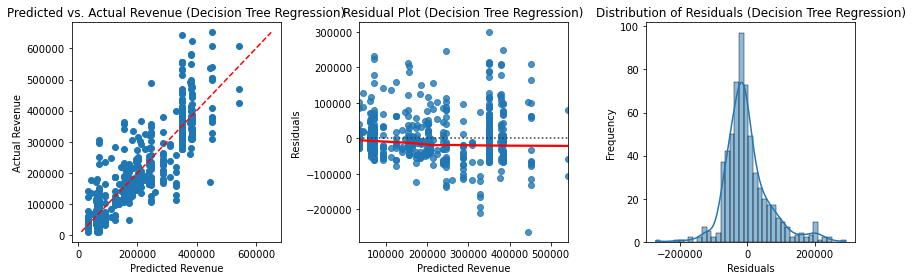

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Decision Tree Regression,67132.2759,66327.0158,46220.7472,47110.5129,0.7981,0.7866


In [67]:
evaluate_model(best_dt_model, X_train, y_train, X_test, y_test, 'Decision Tree Regression')

# Next Model (Adaboost regressor)

In [68]:
final_pipe.steps[-1] = ('model', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                   random_state=42))])

In [69]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.999
Baseline Test Rsquared: 0.7974


In [70]:
final_pipe_grid_adaboost = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__base_estimator__max_depth': [None, 10, 15, 20],  # Parameters for the base estimator (e.g., DecisionTreeRegressor)
    'model__n_estimators': [200, 220, 240],  # Number of estimators (weak learners)
    'model__learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'model__loss': ['linear', 'square', 'exponential'],  # Loss function
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_adaboost = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_adaboost, cv=5)
gs_full_pipe_adaboost.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_adaboost.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_adaboost.best_params_}')

best_ab_model = gs_full_pipe_adaboost.best_estimator_

Best GS Score: 0.7823
Best Parameters: {'model__base_estimator__max_depth': 10, 'model__learning_rate': 0.1, 'model__loss': 'linear', 'model__n_estimators': 200, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'mean'}


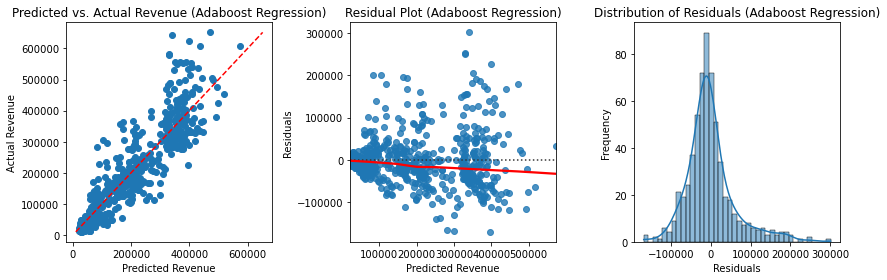

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Adaboost Regression,25313.4958,61321.5606,18145.0606,42436.0931,0.9713,0.8176


In [71]:
evaluate_model(best_ab_model, X_train, y_train, X_test, y_test, 'Adaboost Regression')

# Next Model (XGBoost)

In [72]:
final_pipe.steps[-1] = ('model', XGBRegressor(random_state = 42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, reg_alpha=None, reg_lambda=None,
                              scale_pos_weight=None, subsample=None,
                              tree_method=None, validate_parameters=None,
                              verbosity=None))])

In [73]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.9682
Baseline Test Rsquared: 0.7943


In [74]:
final_pipe_grid_xgboost = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__max_depth': [3, 4, 5, 6, 7],
    'model__learning_rate': [0.01, 0.1, 1.0],
    'model__n_estimators': [150, 155, 160, 165],
    'model__gamma': [0, 0.1, 0.2],
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_xgboost = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_xgboost, cv=5)
gs_full_pipe_xgboost.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_xgboost.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_xgboost.best_params_}')

best_xg_model = gs_full_pipe_xgboost.best_estimator_

Best GS Score: 0.7906
Best Parameters: {'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 165, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'median'}


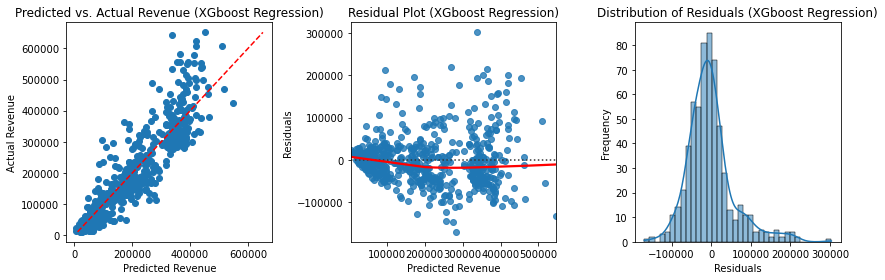

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,XGboost Regression,58242.4314,58894.794,39217.4357,41648.1486,0.848,0.8318


In [75]:
evaluate_model(best_xg_model, X_train, y_train, X_test, y_test, 'XGboost Regression')

# Next Model (GradientBoosting Regressor)

In [76]:
final_pipe.steps[-1] = ('model', GradientBoostingRegressor(random_state = 42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [77]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.8396
Baseline Test Rsquared: 0.8287


In [78]:
final_pipe_grid_gbr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__n_estimators': [150, 200, 250],  # Number of boosting stages to be run
    'model__learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'model__min_samples_split': [4, 5, 6, 7],
    'model__min_samples_leaf': [3, 4, 5],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_gbr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_gbr, cv=5)
gs_full_pipe_gbr.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_gbr.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_gbr.best_params_}')

best_gbr_model = gs_full_pipe_gbr.best_estimator_

Best GS Score: 0.7942
Best Parameters: {'model__learning_rate': 0.1, 'model__max_features': 'auto', 'model__min_samples_leaf': 4, 'model__min_samples_split': 4, 'model__n_estimators': 250, 'preprocess__numpipe__numimputer__strategy': 'median'}


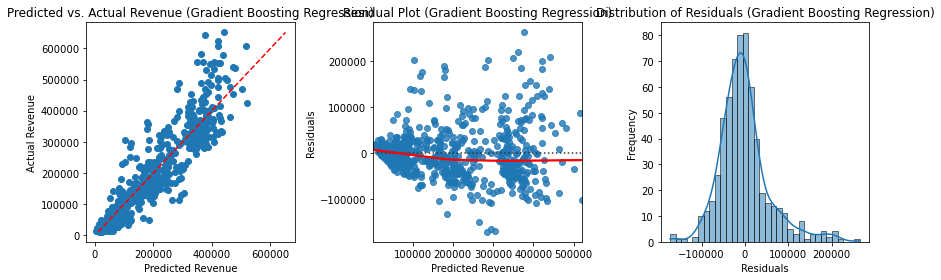

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Gradient Boosting Regression,55043.5355,57726.5675,36787.496,40968.8188,0.8643,0.8384


In [79]:
evaluate_model(best_gbr_model, X_train, y_train, X_test, y_test, 'Gradient Boosting Regression')

# Next Model (Elastic Net Regression)

In [80]:
from sklearn.linear_model import ElasticNet

In [81]:
final_pipe.steps[-1] = ('model', ElasticNet(random_state=42))
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['STATE_NAME'])])),
                ('model', ElasticNet(random_state=42))])

In [82]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: 0.6387
Baseline Test Rsquared: 0.6429


In [83]:
final_pipe_grid_enr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],
    'model__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  # Regularization parameter
    'model__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # Mixing parameter
    'model__fit_intercept': [True, False],  # Whether to fit an intercept
    'model__random_state': [42]
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_enr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_enr, cv=5)
gs_full_pipe_enr.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_enr.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_enr.best_params_}')

best_enr_model = gs_full_pipe_enr.best_estimator_

Best GS Score: 0.6714
Best Parameters: {'model__alpha': 0.1, 'model__fit_intercept': True, 'model__l1_ratio': 0.9, 'model__random_state': 42, 'preprocess__numpipe__numimputer__strategy': 'mean'}


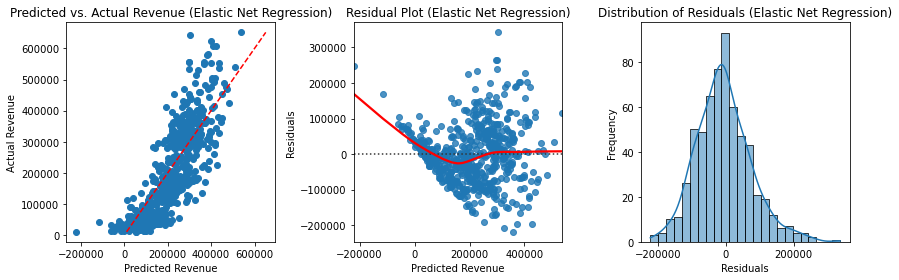

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Elastic Net Regression,84571.7867,80862.9171,62955.5235,62401.821,0.6796,0.6829


In [84]:
evaluate_model(best_enr_model, X_train, y_train, X_test, y_test, 'Elastic Net Regression')

# Next Model (Support Vector Regression)

In [85]:
from sklearn.svm import SVR

In [86]:
final_pipe.steps[-1] = ('model', SVR())
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numimputer',
                                                                   SimpleImputer()),
                                                                  ('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cleaning_Fee'],
      dtype='object')),
                                                 ('nom...
                                                                                              'Tennessee',
                                                                                              'Florida',
                                                                                              'Montana',
                                                                                              'North '
                                                                                              'Carolina',
                                                                                              'Oklahoma',
                                                                                              'Texas',
                                                                                              'Nevada',
                                                                                              'Massachusetts',
                                                                                              'Idaho',
                                                                                              'Washington',
                                                                                              'Georgia',
                                                                                              'Missouri',
                                                                                              'Maryland',
                                                                                              'New '
                                                                                              'Hampshire',
                                                                                              'Arizona',
                                                                                              'Maine',
                                                                                              'Oregon',
                                                                                              'New '
                                                                                              'Mexico',
                                                                                              'South '
                                                                                              'Carolina',
                                                                                              'Arkansas',
                                                                                              'South '
                                                                                              'Dakota',
                                                                                              'West '
                                                                                              'Virginia']],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
      

In [87]:
final_pipe.fit(X_train, y_train)
print(f'Baseline Train Rsquared: {round(final_pipe.score(X_train, y_train),4)}')
print(f'Baseline Test Rsquared: {round(final_pipe.score(X_test, y_test),4)}')

Baseline Train Rsquared: -0.0392
Baseline Test Rsquared: -0.0192


In [88]:
final_pipe_grid_svr = {
    'preprocess__numpipe__numimputer__strategy': ["mean", "median"],  # Assuming 'numimputer' is the name of your imputer step
    'model__kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel function: linear or radial basis function (RBF)
    'model__C': [0.1, 0.5, 1, 3, 4, 5, 6, 7, 8, 9, 10],  # Regularization parameter
    'model__gamma': ['scale', 'auto']  # Kernel coefficient for RBF kernel
}

# Perform GridSearchCV with the pipeline
gs_full_pipe_svr = GridSearchCV(estimator=final_pipe, param_grid=final_pipe_grid_svr, cv=5)
gs_full_pipe_svr.fit(X_train, y_train)

print(f'Best GS Score: {round(gs_full_pipe_svr.best_score_, 4)}')
print(f'Best Parameters: {gs_full_pipe_svr.best_params_}')

best_svr_model = gs_full_pipe_svr.best_estimator_

Best GS Score: 0.3035
Best Parameters: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear', 'preprocess__numpipe__numimputer__strategy': 'mean'}


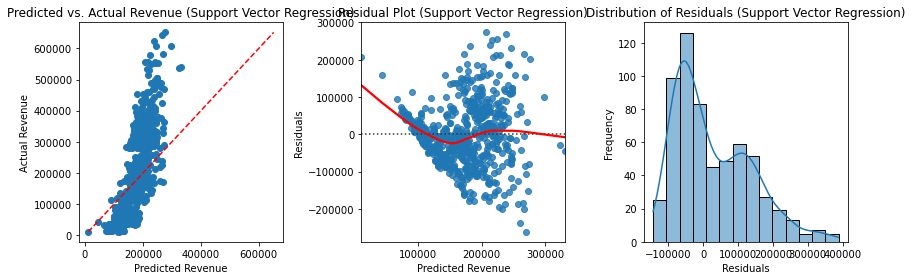

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Support Vector Regression,119957.209,112391.2238,91694.3911,88257.2258,0.3554,0.3873


In [89]:
evaluate_model(best_svr_model, X_train, y_train, X_test, y_test, 'Support Vector Regression')

# StackingRegressor

In [90]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('ab', best_ab_model),
    ('xg', best_xg_model),
    ('gbr', best_gbr_model)
]

sr = StackingRegressor(estimators, final_estimator=LinearRegression())

In [91]:
sr.fit(X_train, y_train)

StackingRegressor(estimators=[('ab',
                               Pipeline(steps=[('preprocess',
                                                ColumnTransformer(transformers=[('numpipe',
                                                                                 Pipeline(steps=[('numimputer',
                                                                                                  SimpleImputer()),
                                                                                                 ('numnorm',
                                                                                                  StandardScaler())]),
                                                                                 Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'C...
                                                                                                                             'Hampshire',
                                                                                                                             'Arizona',
                                                                                                                             'Maine',
                                                                                                                             'Oregon',
                                                                                                                             'New '
                                                                                                                             'Mexico',
                                                                                                                             'South '
                                                                                                                             'Carolina',
                                                                                                                             'Arkansas',
                                                                                                                             'South '
                                                                                                                             'Dakota',
                                                                                                                             'West '
                                                                                                                             'Virginia']],
                                                                                                                drop='first',
                                                                                                                handle_unknown='ignore',
                                                                                                                sparse=False))]),
                                                                                 ['STATE_NAME'])])),
                                               ('model',
                                                GradientBoostingRegressor(max_features='auto',
                                                                          min_samples_leaf=4,
                                                                          min_samples_split=4,
                                                                          n_estimators=250,
                                                                          random_state=42))]))],
                  final_estimator=LinearRegression())

In [92]:
print(f'Train Rsquared: {round(sr.score(X_train, y_train),4)}')
print(f'Test Rsquared: {round(sr.score(X_test, y_test),4)}')

Train Rsquared: 0.9178
Test Rsquared: 0.8384


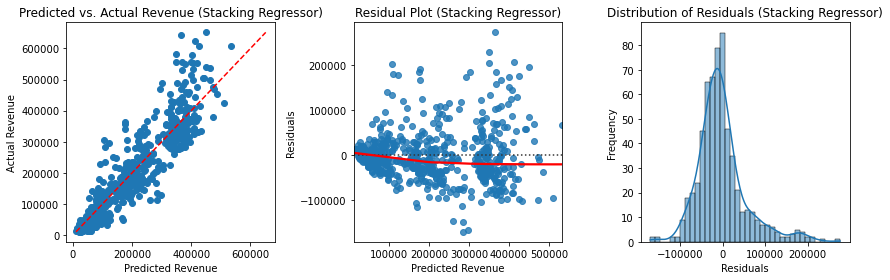

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Stacking Regressor,42842.6825,57726.1382,30156.5117,40605.1438,0.9178,0.8384


In [93]:
evaluate_model(sr, X_train, y_train, X_test, y_test, 'Stacking Regressor')

# Voting Regressor

In [94]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor(estimators)

In [95]:
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('ab',
                             Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('numpipe',
                                                                               Pipeline(steps=[('numimputer',
                                                                                                SimpleImputer()),
                                                                                               ('numnorm',
                                                                                                StandardScaler())]),
                                                                               Index(['BEDROOMS', 'ACCOMMODATES', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN',
       'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER',
       'MINIMUM_STAY', 'Available_Nights', 'Cle...
                                                                                                                           'Missouri',
                                                                                                                           'Maryland',
                                                                                                                           'New '
                                                                                                                           'Hampshire',
                                                                                                                           'Arizona',
                                                                                                                           'Maine',
                                                                                                                           'Oregon',
                                                                                                                           'New '
                                                                                                                           'Mexico',
                                                                                                                           'South '
                                                                                                                           'Carolina',
                                                                                                                           'Arkansas',
                                                                                                                           'South '
                                                                                                                           'Dakota',
                                                                                                                           'West '
                                                                                                                           'Virginia']],
                                                                                                              drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['STATE_NAME'])])),
                                             ('model',
                                              GradientBoostingRegressor(max_features='auto',
                                                                        min_samples_leaf=4,
                                                                        min_samples_split=4,
                                                                        n_estimators=250,
                                                    

In [96]:
print(f'Train Rsquared: {round(voting_regressor.score(X_train, y_train),4)}')
print(f'Test Rsquared: {round(voting_regressor.score(X_test, y_test),4)}')

Train Rsquared: 0.9137
Test Rsquared: 0.837


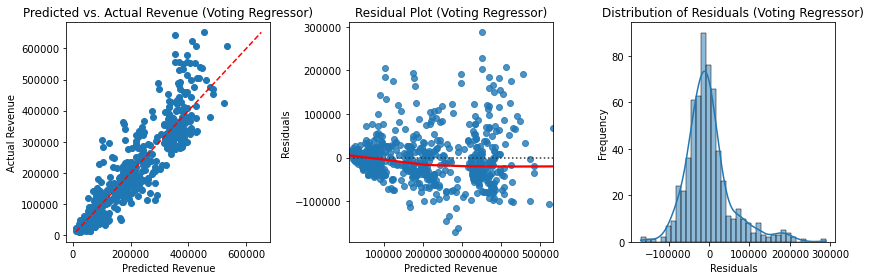

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
0,Voting Regressor,43891.0588,57976.9298,30890.7178,40707.6213,0.9137,0.837


In [97]:
evaluate_model(voting_regressor, X_train, y_train, X_test, y_test, 'Voting Regressor')

# Summary

In [98]:
all_metrics_df.sort_values(by='Test R^2', ascending=False)

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R^2,Test R^2
7,Gradient Boosting Regression,55043.5355,57726.5675,36787.4960,40968.8188,0.8643,0.8384
10,Stacking Regressor,42842.6825,57726.1382,30156.5117,40605.1438,0.9178,0.8384
11,Voting Regressor,43891.0588,57976.9298,30890.7178,40707.6213,0.9137,0.8370
6,XGboost Regression,58242.4314,58894.7940,39217.4357,41648.1486,0.8480,0.8318
5,Adaboost Regression,25313.4958,61321.5606,18145.0606,42436.0931,0.9713,0.8176
4,Decision Tree Regression,67132.2759,66327.0158,46220.7472,47110.5129,0.7981,0.7866
3,KNeighbors Regression,474.8732,78556.6315,21.9353,57644.6915,1.0000,0.7007
2,Lasso Regression,83545.8858,79513.7219,61891.9664,61667.7066,0.6873,0.6934
0,Linear Regression,83545.6686,79516.2759,61888.4860,61672.2107,0.6873,0.6933
1,Ridge Regression,83686.9855,79608.6407,62062.8609,61602.7549,0.6863,0.6926
